** 02805 Social graphs and interactions **

# Part 1: Network Models

## Watts-Strogatz Networks

** a) Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity p = 0, 0.1, and 1. Calculate the average shortest path length < d > for each one. Describe what happens to the network when p = 1. **

In [2]:
import networkx as nx
import numpy as np
import pprint

N = 500 # Nodes
k = 4 # Average degree

# Increasing probability means a more random network
p1 = 0 # Probability 1
p2 = 0.1 # Probability 2
p3 = 1 # Probability 3

# watts_strogatz_graph(n, k, p, seed=None)
wsG1 = nx.watts_strogatz_graph(N, k, p1)
wsG2 = nx.watts_strogatz_graph(N, k, p2)
wsG3 = nx.watts_strogatz_graph(N, k, p2)

# Calculating the average shortest path length
d1 = nx.average_shortest_path_length(wsG1, weight=None)
d2 = nx.average_shortest_path_length(wsG2, weight=None)
d3 = nx.average_shortest_path_length(wsG3, weight=None)

print "Average shortest path length for graph 1:", d1
print "Average shortest path length for graph 2:", d2
print "Average shortest path length for graph 3:", d3

Average shortest path length for graph 1: 62.875751503
Average shortest path length for graph 2: 7.72288577154
Average shortest path length for graph 3: 7.92004809619


At p = 1 the network is fully randomized.

** b) Generate 50 networks with N = 500, < k > = 4, for each of p = {0, 0.01, 0.03, 0.05, 0.1, 0.2}. Calculate the average of < d > as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. **

In [3]:
p_list = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
avgD = [[] for i in range(50)]
avg = []
sd = []

for i in range(0, len(p_list)):
    for j in range(0, 50):
        wsGraphs = nx.watts_strogatz_graph(N, k, p_list[i])
        avgD[i].append(nx.average_shortest_path_length(wsGraphs))
    
    avg.append(sum(avgD[i]) / float(len(avgD[i])))
    sd.append(np.std(avgD[i]))
    
    print "p:", p_list[i]
    print "Average path length:", avgD[i][0:4]
    print "Average of <d>:", avg[i]
    print "Standard deviation:", sd[i]
    print

p: 0
Average path length: [62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015]
Average of <d>: 62.875751503
Standard deviation: 7.1054273576e-15

p: 0.01
Average path length: [20.01314629258517, 22.15931863727455, 20.613835671342684, 25.5357995991984]
Average of <d>: 23.4521675351
Standard deviation: 3.38645833734

p: 0.03
Average path length: [14.587094188376753, 15.71306613226453, 14.371142284569139, 11.664713426853707]
Average of <d>: 13.2833827655
Standard deviation: 1.33295398171

p: 0.05
Average path length: [10.155438877755511, 10.248072144288576, 10.809386773547095, 9.60901002004008]
Average of <d>: 10.2703897395
Standard deviation: 0.765910995328

p: 0.1
Average path length: [7.976769539078156, 7.70860120240481, 7.475462925851703, 7.604064128256513]
Average of <d>: 7.71111422846
Standard deviation: 0.283375188689

p: 0.2
Average path length: [6.024144288577154, 6.211983967935872, 6.049579158316633, 6.067951903807615]
Average of <d>: 6.11141803607
St

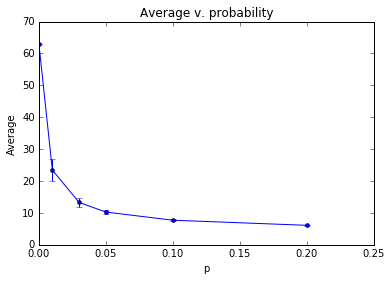

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

x = p_list
y = avg
errorBar = sd

# Plot
plt.errorbar(x, y, yerr = errorBar, marker='o', markersize=4)
plt.title("Average v. probability")
plt.xlabel("p")
plt.ylabel("Average")
plt.show()

## The Barabasi-Albert Model

** a) Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX. **

Number of nodes: 100
Number of edges: 100


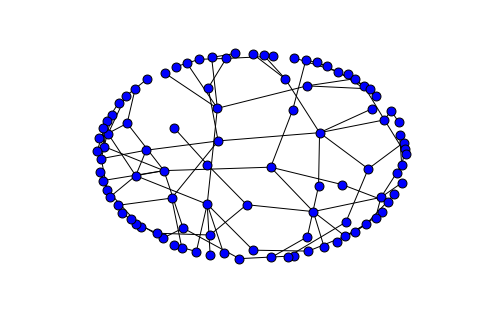

In [44]:
%reset -f
import networkx as nx
import numpy as np
import pprint
import random as rand
import matplotlib.pyplot as plt
%matplotlib inline

G = nx.Graph();
G.add_nodes_from([0, 1])
G.add_edge(0, 1)

for i in range(1, 100):
    # Random node to connect to
    randNode = rand.choice(G.nodes())
    
    # Add node & edge
    G.add_node(i)
    G.add_edge(i, randNode)
    
nx.draw_spring(G, node_color='blue', with_labels=False, node_size=80)

print "Number of nodes:", len(G.nodes())
print "Number of edges:", len(G.edges())

** b) Now create a 5000 node network. **

Number of nodes: 5000
Number of edges: 5000


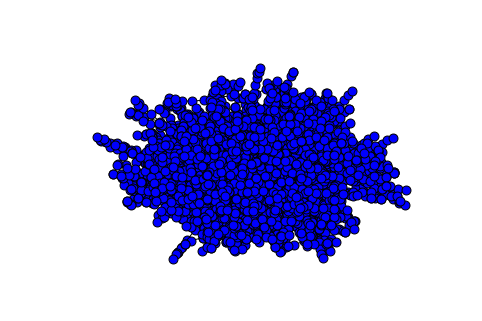

In [45]:
for i in range(100, 5000):
    # Random node to connect to
    randNode = rand.choice(G.nodes())
    
    # Add node & edge
    G.add_node(i)
    G.add_edge(i, randNode)
    
nx.draw_spring(G, node_color='blue', with_labels=False, node_size=80)

print "Number of nodes:", len(G.nodes())
print "Number of edges:", len(G.edges())

** c) What's the maximum and minimum degree? **

In [46]:
# Degree
degree = nx.degree(G).values()
print "Maximum degree:", max(degree)
print "Minimum degree:", min(degree)

Maximum degree: 13
Minimum degree: 1


** d) Now, bin the degree distribution, for example using numpy.histogram. **

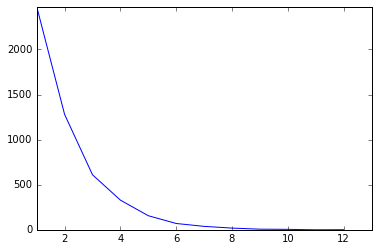

In [47]:
bins = range(min(degree), max(degree) + 1) 
hist, bin_edges = np.histogram(degree, bins = bins)

plt.plot(bin_edges[:-1], hist)
plt.axis([min(bin_edges), max(bin_edges), min(hist), max(hist)])
plt.show()

** e) Plot the distribution. Plot it with both linear and log-log axes. **

In [ ]:
LOG LOG PLOT!

## Power-laws and the friendship paradox

** a) Pick a node i at random (e.g. use random.choice). Find its degree. **

In [61]:
i = rand.choice(G.nodes())
iDegree = G.degree(i)

print "Random node i:", i
print "Degree:", iDegree

Random node i: 178
Degree: 4


** b) Find i's neighbors. And calculate their average degree. **

In [62]:
iNeighbors = G.neighbors(i)
fpDegree = sum(G.degree(iNeighbors).values()) / float(len(iNeighbors))

print "Random node i:", i
print "Degree:", iDegree
print "Neighbors:", iNeighbors
print
print "Average degree of neighbors:", fpDegree

Random node i: 178
Degree: 4
Neighbors: [721, 403, 3078, 15]

Average degree of neighbors: 2.5


** c) Compare the two numbers to check if it's true that i's friends (on average) have more friends than i. **

In [ ]:
????

** d) Do this 1000 times. How many out of those 1000 times is the friendship paradox true? **

In [63]:
count = 0

for j in range(1000):
    i = rand.choice(G.nodes())
    iDegree = G.degree(i)
    iNeighbors = G.neighbors(i) 
    fpDegree = sum(G.degree(iNeighbors).values()) / float(len(iNeighbors))
    
    if fpDegree > iDegree:
        count += 1
        
print "Counts of true:", count, " / 1000"

Counts of true: 683  / 1000


## Growth without preferential attachment

** Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment. Compare the network you've just built to the ER network of same size and same p. What are the differences? Explain in your own words. **

# Part 2: The Wikipedia Philosopher's network

## Basic stats

** a) How many philosophers in each list? How many total? **

In [65]:
%reset -f

import io
import re

# Open file
path = "../Python/Week4/"
fileAes = io.open(path + 'wikiAestheticians.txt', 'r')
fileEpi = io.open(path + 'wikiEpistemologists.txt', 'r')
fileEth = io.open(path + 'wikiEthicists.txt', 'r')
fileLog = io.open(path + 'wikiLogicians.txt', 'r', encoding='utf-8')
fileMeta = io.open(path + 'wikiMetaphysicians.txt', 'r')
fileSoc = io.open(path + 'wikiSocialAndPoliticalPhilosophers.txt', 'r')

#getAes = re.findall(r'\*\[\[(.*?)\]\]', fileAes.read())
#getEpi = re.findall(r'\*\[\[(.*?)\]\]', fileEpi.read())
#getEth = re.findall(r'\*\[\[(.*?)\]\]', fileEth.read())
#getLog = re.findall(r'\* \[\[(.*?)\]\]', fileLog.read())
#getMeta = re.findall(r'\* \[\[(.*?)\]\]', fileMeta.read())
#getSoc = re.findall(r'\*\[\[(.*?)\]\]', fileSoc.read())

reAes = re.findall(r'\*\s*([\w\.\s]*)(\[*)([\w\s\.-]+)([\w\s\.|()-,]*)(\]\])', fileAes.read(), re.UNICODE)
reEpi = re.findall(r'\*\s*([\w\.\s]*)(\[*)([\w\s\.-]+)([\w\s\.|()-,]*)(\]\])', fileEpi.read(), re.UNICODE)
reEth = re.findall(r'\*\s*([\w\.\s]*)(\[*)([\w\s\.-]+)([\w\s\.|()-,]*)(\]\])', fileEth.read(), re.UNICODE)
reLog = re.findall(r'\*\s*([\w\.\s]*)(\[*)([\w\s\.-]+)([\w\s\.|()-,]*)(\]\])', fileLog.read(), re.UNICODE)
reMeta = re.findall(r'\*\s*([\w\.\s]*)(\[*)([\w\s\.-]+)([\w\s\.|()-,]*)(\]\])', fileMeta.read(), re.UNICODE)
reSoc = re.findall(r'\*\s*([\w\.\s]*)(\[*)([\w\s\.-]+)([\w\s\.|()-,]*)(\]\])', fileSoc.read(), re.UNICODE)

# Loop through to get the third group
getAes = []
getEpi = []
getEth = []
getLog = []
getMeta = []
getSoc = []

[getAes.append(reAes[i][2]) for i in range(len(reAes))]
[getEpi.append(reEpi[i][2]) for i in range(len(reEpi))]
[getEth.append(reEth[i][2]) for i in range(len(reEth))]
[getLog.append(reLog[i][2]) for i in range(len(reLog))]
[getMeta.append(reMeta[i][2]) for i in range(len(reMeta))]
[getSoc.append(reSoc[i][2]) for i in range(len(reSoc))]

getAll = getAes + getEpi + getEth + getLog + getMeta + getSoc
getAllUnique = list(set(getAes + getEpi + getEth + getLog + getMeta + getSoc))

totalAes = len(getAes)
totalEpi = len(getEpi)
totalEth = len(getEth)
totalLog = len(getLog)
totalMeta = len(getMeta)
totalSoc = len(getSoc)
totalAll = len(getAll)
  
print "Total Aestheticians:", totalAes
print "Total Epistemologists:", totalEpi
print "Total Ethicists:", totalEth
print "Total Logicians:", totalLog
print "Total Metaphysicians:", totalMeta
print "Total Social and political philosophers:", totalSoc

print "\nTotal philosophers:", len(getAll)
print "Total unique philosophers:", len(getAllUnique)

Total Aestheticians: 126
Total Epistemologists: 99
Total Ethicists: 272
Total Logicians: 270
Total Metaphysicians: 96
Total Social and political philosophers: 297

Total philosophers: 1160
Total unique philosophers: 1013


** b) Which is the largest branch of philosophy? (according to number of Wikipedia philosopher-pages) **

In [66]:
print "\nLargest branch:", max(totalAes, totalEpi,totalEth, totalLog, totalMeta, totalSoc)


Largest branch: 297


The Social and Political branch is the largest with 297 philosophers.

** c) Which philosopher is in most lists & and how many? **

In [67]:
from collections import Counter
getOccurances = sorted(Counter(getAll).items(), key=lambda pair: pair[1], reverse=True)

print getOccurances[0:5]

[(u'Thomas Aquinas', 6), (u'Aristotle', 6), (u'Plato', 5), (u'Bertrand Russell', 5), (u'Immanuel Kant', 5)]


Aristitle and Thomas Aquinas share the first place, as both are represented in all 6 lists.

** d) Create a list of every philosopher that occurs in more than one list. **

In [68]:
multiOccurances = []

for i in range(len(getOccurances)):
    if getOccurances[i][1] > 1:
        multiOccurances.append(getOccurances[i])
        #print multiOccurances[i]
print multiOccurances[0:5]

[(u'Thomas Aquinas', 6), (u'Aristotle', 6), (u'Plato', 5), (u'Bertrand Russell', 5), (u'Immanuel Kant', 5)]


** e) Use Python to sort the list according to how many lists each philosopher belongs to (so the guy you found in the previous question is first in that list). **

The above list is already sorted.

** f) Print the top 5 guys and their list counts. Have you heard of any of them?  **

In [69]:
for i in range(5):
    print multiOccurances[i][0], "- [", multiOccurances[i][1], "]"

Thomas Aquinas - [ 6 ]
Aristotle - [ 6 ]
Plato - [ 5 ]
Bertrand Russell - [ 5 ]
Immanuel Kant - [ 5 ]


Heard about them all.

 c-f) SHOULD BE RECHECKED

## Degree distribution

** a) Why do you think we want to use a directed graph? Could have we used an undirected graph instead? **
* ...

** b) What is the total number of nodes in the network? What is the total number of links? What's the average degree? What's the median degree? **

In [73]:
import networkx as nx
import codecs

G = nx.DiGraph();
G.add_nodes_from(getAllUnique)

# Check if a philosopher is linked to through all files and links

# First loop for all philosophers
for i in range(len(getAllUnique)):
    # Substitute spaces with \s for search
    formatSpace = re.sub(r'\s', r'\s', getAllUnique[i])

    # Second loop for all files
    for j in range(len(getAllUnique)):    
        # Substitute spaces with underscore for file name
        formatName = re.sub(r'\s', r'_', getAllUnique[j]).encode('utf-8')
        
        # Open file and get all links
        getFile = codecs.open(path + 'philosophers/' + formatName + '.txt', 'r', encoding='utf-8')
        getLinks = re.findall(r'\[\[(.*?)\]\]', getFile.read())

        # Third loop for all links in files
        for links in getLinks:
            # Get all instances where name is in link
            getAnd = re.search(r'' + getAllUnique[i], links)
            if getAnd:
                G.add_edge(getAllUnique[i], getAllUnique[j])
                #print getAllUnique[i] + " is linked to " + getAllUnique[j]
                #print

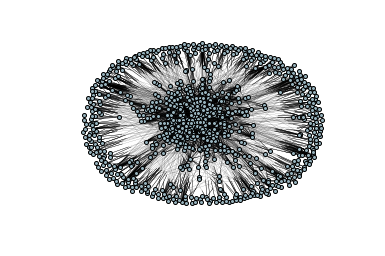

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=False, node_size=16, width=0.1, node_color="#99B5BF")
plt.axis('off')
plt.show()

In [75]:
import numpy as np

print "Total nodes:", len(G.nodes())
print "Total links:", len(G.edges())
print "Average degree:", sum(G.degree().values()) / float(len(G.degree().values()))
print "Median degree:", np.median(G.degree().values())

Total nodes: 1013
Total links: 5114
Average degree: 10.0967423495
Median degree: 5.0


** c) Provide similar statistics for the???? **

** d) List the top 10 philosophers by in-degree and out-degree. What is the interpretation of in-degree and out-degree in this case? Have you heard about these philosophers before? **

** e) Plot the distribution of in-degrees and out-degrees, binned using (for example) numpy.histogram. What is the most common degree? **

** f) Plot the distribution of in-degrees and out-degrees one more time, this time plotted loglog scale. **

** g) Describe the distributions (as you would in a well written figure caption). Do they look Poissonian? Power-law? Something in between? **

** h) Plot a scatter plot of the the in- versus out- degree for all philosophers using a loglog scale. Comment on the relation between the two. Do any particular philosophers stand out? **